Пропущенные значения в данных:
Наименование продукта    0
Производитель            0
Тип                      0
Калорийность             0
Белки, г.                0
Жиры, г.                 0
Натрий, мг               0
Пищевые волокна, г.      0
Углеводы, г              0
Сахар, г.                0
Калий, мг.               0
Витамины, %              0
№ витрины                0
Вес                      0
Чашек воды на порцию     0
Пищевая ценность         0
dtype: int64
Пропущенные значения после заполнения:
Наименование продукта    0
Производитель            0
Тип                      0
Калорийность             0
Белки, г.                0
Жиры, г.                 0
Натрий, мг               0
Пищевые волокна, г.      0
Углеводы, г              0
Сахар, г.                0
Калий, мг.               0
Витамины, %              0
№ витрины                0
Вес                      0
Чашек воды на порцию     0
Пищевая ценность         0
dtype: int64


c:\Users\Andrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


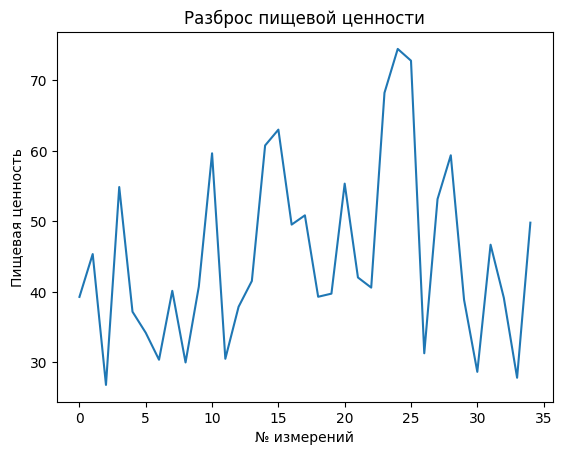

Матрица корреляции:
             Сахар, г.  Углеводы, г
Сахар, г.     1.000000    -0.286514
Углеводы, г  -0.286514     1.000000


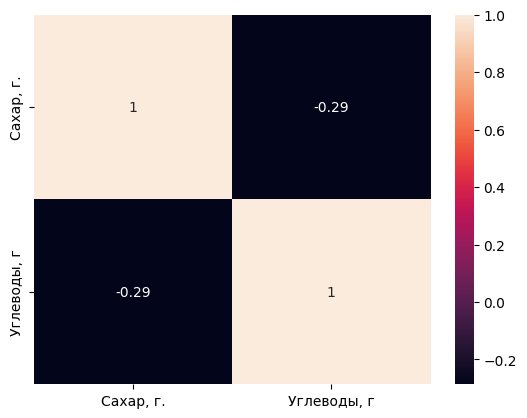

C:\Users\Andrey\AppData\Local\Temp\ipykernel_2368\3831825037.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Стандартная ошибка: ", ols_model_res.bse[-1])


Коэффициенты модели:
                 coef
Сахар, г.   -9.770592
Углеводы, г -1.893530
Статистика модели:
                  coef  p-value       vif
const        44.160189    0.000  1.012168
Сахар, г.    -9.770592    0.000  1.018256
Углеводы, г  -1.893530    0.236  1.018256
BIC= 174.9983042976509
*** Коэффициенты регрессии ***
Наклон линии (направление зависимости) =  [-9.77059226 -1.89352971]
Изменение высоты относительно оси X =  44.160188597645934
Стандартная ошибка:  1.5522967993068473
Коэффициент детерминации для обучающей выборки r^2 = 0.574
Коэффициент детерминации для тестовой выборки r^2 = 0.7
Ошибка относительно среднего значения y = 46.83621545454545
Регрессионная квадратичная сумма 1323.758759186058
Квадратичная сумма ошибки 732.5345076835367
Общая квадратичная сумма 2056.293266869595
F-критерий 7.228376248770177


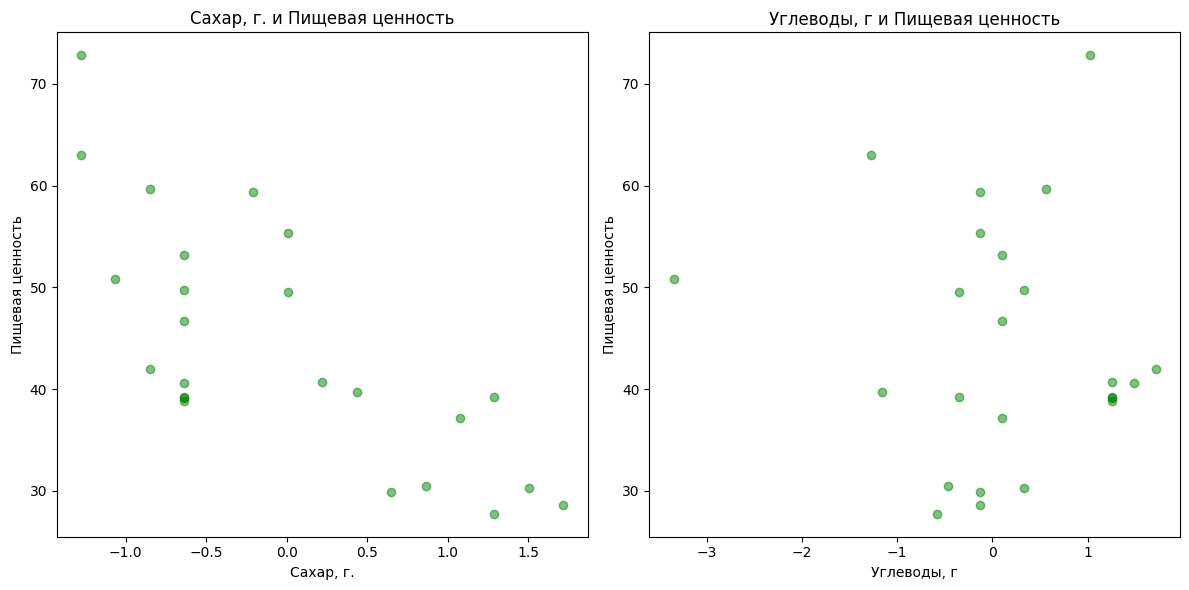

Коэффициент (№ переменной) 0: t-критерий = -13.170
Коэффициент (№ переменной) 1: t-критерий = -1.620


In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

# Загрузка данных
excel = 'cereals.xlsx'
data = pd.read_excel(excel)
data.to_csv('hlopya.csv', index=None, header=True)
data = pd.read_csv('hlopya.csv')
# Ограничение на строки с 40 по 75 и сброс индексов
data = data.iloc[40:75].reset_index(drop=True)

# Проверка на пропущенные значения
print("Пропущенные значения в данных:")
print(data.isnull().sum())

# Заполнение пропущенных значений средним арифметическим для числовых столбцов
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Проверка, что пропущенных значений больше нет
print("Пропущенные значения после заполнения:")
print(data.isnull().sum())

# Выбор только двух признаков: 'Сахар, г.' и 'Углеводы, г'
features = data[['Сахар, г.', 'Углеводы, г']]
target_value = data['Пищевая ценность']

# Визуализация данных
plt.plot(target_value)
plt.title('Разброс пищевой ценности')
plt.ylabel('Пищевая ценность')
plt.xlabel('№ измерений')
plt.show()

# Анализ корреляции
correlation = features.corr()
print("Матрица корреляции:")
print(correlation)
sns.heatmap(correlation, annot=True)
plt.show()

# Масштабирование данных
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_value, test_size=0.3, random_state=10)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Значения коэффициентов для каждой переменной
coefs = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])
print("Коэффициенты модели:")
print(coefs)

# Добавление константы для статистического анализа
X_incl_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_incl_const)
ols_model_res = ols_model.fit()

# Расчет VIF (фактор инфляции дисперсии)
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
pvalues = pd.DataFrame({'coef': ols_model_res.params, 'p-value': round(ols_model_res.pvalues, 3)})
pvalues['vif'] = vif
print("Статистика модели:")
print(pvalues)
print('BIC=', ols_model_res.bic)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mean_y = np.mean(y_test)
SSR = np.sum((y_pred - mean_y) ** 2)  # регрессионная квадратичная сумма
SSE = np.sum((y_test - y_pred) ** 2)  # квадратичная сумма ошибки
SST = SSR + SSE  # общая квадратичная сумма
mse = mean_squared_error(y_pred, y_test)
n = X_test.shape[0]  # число наблюдений
p = X_test.shape[1]  # число признаков
F = (SSR / p) / (SSE / (n - p - 1))  # F-критерий

# Вывод результатов
print('*** Коэффициенты регрессии ***')
print('Наклон линии (направление зависимости) = ', model.coef_)
print('Изменение высоты относительно оси X = ', model.intercept_)
print("Стандартная ошибка: ", ols_model_res.bse[-1])
print('Коэффициент детерминации для обучающей выборки r^2 =', round(model.score(X_train, y_train), 3))
print('Коэффициент детерминации для тестовой выборки r^2 =', round(model.score(X_test, y_test), 3))
print('Ошибка относительно среднего значения y =', mean_y)
print('Регрессионная квадратичная сумма', SSR)
print('Квадратичная сумма ошибки', SSE)
print('Общая квадратичная сумма', SST)
print('F-критерий', F)

# Визуализация разброса данных
plt.figure(figsize=(12, 6))
for i, col in enumerate(features.columns):
    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train[col], y_train, color='green', alpha=0.5)
    plt.title(col + ' и Пищевая ценность')
    plt.xlabel(col)
    plt.ylabel('Пищевая ценность')
plt.tight_layout()
plt.show()

# T-тест для коэффициентов
for i, coef in enumerate(model.coef_):
    X_i = X_test.iloc[:, i]
    se_b_i = np.sqrt(mse / (n - p - 1)) / np.sqrt(np.sum((X_i - np.mean(X_i)) ** 2))
    t_stat = coef / se_b_i
    print(f"Коэффициент (№ переменной) {i}: t-критерий = {t_stat:.3f}")